In [ ]:
import pandas as pd

iris_dataset = pd.read_csv("iris.csv")

In [ ]:
from sklearn.datasets import load_iris

iris_sk = load_iris()

In [ ]:
print(type(iris_dataset))
type(iris_sk)

<class 'pandas.core.frame.DataFrame'>


sklearn.utils._bunch.Bunch

# Data Exploration function

In [ ]:
iris_dataset

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
iris_dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
iris_dataset.tail()

,sepal.length,sepal.width,petal.length,petal.width,species
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
iris_dataset.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'species'],
      dtype='object')

In [ ]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_dataset.shape

(150, 5)

In [ ]:
iris_dataset.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
species         0
dtype: int64

# Min-Max Normalisation

You are provided with a dataset that contains information about 1000 houses. For each house, you have three pieces of data: the number of bedrooms, the square footage, and the price. You aim to build a model that predicts the number of bedrooms in a house based on its square footage and price.

However, the square footage values are in the range of **1000-3000** while the prices are in the range of $**100,000-5,000,000**.

To tackle this issue, we will use Min-Max normalisation. Min-Max normalisation scales the values in a particular feature to the range of 0 to 1. Here's the min-max normalisation formula:

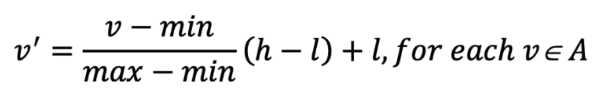

After normalising the square footage values, you can train your model on this pre-processed data and make predictions. The advantage of Min-Max normalisation is that it helps to handle cases where the values in a particular feature have a much larger scale than the values in other features.

In [ ]:
import numpy as np

def min_max_normalise(data):
    data_min = np.min(data)
    data_max = np.max(data)
    return (data - data_min) / (data_max - data_min)

area = np.array([1200, 1500, 1700, 2000, 2400, 3000])
price = np.array([200000, 600000, 900000, 1500000, 2200000, 3500000])

normalised_area_feet = min_max_normalise(area)
print(normalised_area_feet)

# Ex1: calculate min-max normalisation for prices, then print them
normalised_price = min_max_normalise(price)
print(normalised_price)

[0.         0.16666667 0.27777778 0.44444444 0.66666667 1.        ]
[0.         0.12121212 0.21212121 0.39393939 0.60606061 1.        ]


# Standardisation / Z-score normalisation

Let's say you have a dataset of house prices and the features include the size of the house in square feet and the number of bedrooms. The size of the house is measured in square feet, which ranges from **500** to **5000**, while the number of bedrooms ranges from **1** to **5**. These features are on different scales, making it difficult to compare their relative importance.

we will use Z-score normalisation to standardize the scores. Z-score normalisation transforms each value so that it represents how many standard deviations it is away from the mean. Here's the formula for Z-score normalisation:

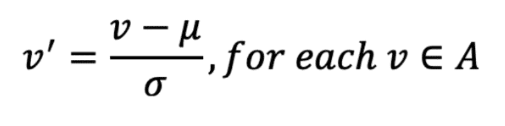



In [ ]:
import numpy as np

def z_score_normalise(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean) / std

size = np.array([1200, 580, 840, 910, 800, 2000, 500, 4200, 5000, 3000])
size_normalised = z_score_normalise(size)
print(size_normalised)

[-0.45736206 -0.86072547 -0.69157307 -0.64603204 -0.71759651  0.06310686
 -0.91277236  1.49439637  2.01486528  0.713693  ]


In [ ]:
# Ex2: Create a numpy array (a list) of 10 numbers of bedrooms, calculate z-score normalisation for them and print out the result.
bedrooms = [2, 3, 4, 5, 3, 2, 2, 1, 2]
bedrooms_normalised = z_score_normalise(bedrooms)
print(bedrooms_normalised)

[-0.57735027  0.28867513  1.15470054  2.02072594  0.28867513 -0.57735027
 -0.57735027 -1.44337567 -0.57735027]


# Maximum Absolute normalisation
Maximum Absolute normalisation also scales each feature to a range of [-1, 1]. It is calculated by dividing each value by the maximum absolute value of that feature.  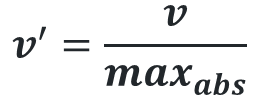


In [ ]:
# Ex 4: Finish the function below:
import numpy as np

def max_abs_normalise(data):
  # calculate the maximum absolute value of data:
  max_abs = abs(max(data))
  return data / max_abs

#### Suppose you have a dataset of two features, age and income, and you want to normalize the data using max absolute scaling

In [ ]:
age_income =  np.array([[20, 20000],
                        [25, 30000],
                        [30, 40000],
                        [35, 60000],
                        [40, 100000]])

In [ ]:
ages = age_income[:, 0]
incomes = age_income[:, 1]

age_normalised = max_abs_normalise(ages)
print(age_normalised)

income_normalised = max_abs_normalise(incomes)
print(income_normalised)

[0.5   0.625 0.75  0.875 1.   ]
[0.2 0.3 0.4 0.6 1. ]


# Normalisation built-in functions

Above we have created the functions for the normalisation fom scratch, but there are faster ways to normalise the data. There are sklearn built-in functions to automatically normalise all the values in a feature.

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler # for the min max normalisation
from sklearn.preprocessing import StandardScaler # for the z-score normalisation
from sklearn.preprocessing import MaxAbsScaler # for the max abs normalisation

In [ ]:
ages_incomes =  np.array([[20, 20000],
                        [25, 30000],
                        [30, 40000],
                        [35, 60000],
                        [40, 100000]])

# Initialize a object
MinMax_scaler = MinMaxScaler()
Zscore_scaler = StandardScaler()
MaxAbs_scaler = MaxAbsScaler()

# Fit the scaler to the data
data_MinMax_scaled = MinMax_scaler.fit_transform(ages_incomes)
data_Zscore_scaled = Zscore_scaler.fit_transform(ages_incomes)
data_MaxAbs_scaled = MaxAbs_scaler.fit_transform(ages_incomes)

print("Min Max Scaler: \n" + str(data_MinMax_scaled))
print("Zscore Scaler: \n" + str(data_Zscore_scaled))
print("Max Abs Scaler: \n" + str(data_MaxAbs_scaled))

Min Max Scaler: 
[[0.    0.   ]
 [0.25  0.125]
 [0.5   0.25 ]
 [0.75  0.5  ]
 [1.    1.   ]]
Zscore Scaler: 
[[-1.41421356 -1.06066017]
 [-0.70710678 -0.70710678]
 [ 0.         -0.35355339]
 [ 0.70710678  0.35355339]
 [ 1.41421356  1.76776695]]
Max Abs Scaler: 
[[0.5   0.2  ]
 [0.625 0.3  ]
 [0.75  0.4  ]
 [0.875 0.6  ]
 [1.    1.   ]]


In [ ]:
# 1. fit
# 2. transform
# 3. fit_transform